<a href="https://colab.research.google.com/github/asthaasati/EDATitanic/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, zscore
import numpy as np

In [2]:
df = pd.read_csv('/content/titanic.csv')

In [3]:
print( df.shape)

(891, 15)


In [4]:
df.columns = df.columns.str.strip().str.lower()

In [6]:
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [7]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [8]:
df['family_size'] = df['sibsp'] + df['parch'] + 1

In [9]:
df.drop(columns=['name', 'ticket', 'cabin'], errors='ignore', inplace=True)

In [10]:
print( df.head())

   survived  pclass  sex   age  sibsp  parch     fare  embarked  class    who  \
0         0       3    0  22.0      1      0   7.2500         0  Third    man   
1         1       1    1  38.0      1      0  71.2833         1  First  woman   
2         1       3    1  26.0      0      0   7.9250         0  Third  woman   
3         1       1    1  35.0      1      0  53.1000         0  First  woman   
4         0       3    0  35.0      0      0   8.0500         0  Third    man   

   adult_male deck  embark_town alive  alone  family_size  
0        True  NaN  Southampton    no  False            2  
1       False    C    Cherbourg   yes  False            2  
2       False  NaN  Southampton   yes   True            1  
3       False    C  Southampton   yes  False            2  
4        True  NaN  Southampton    no   True            1  


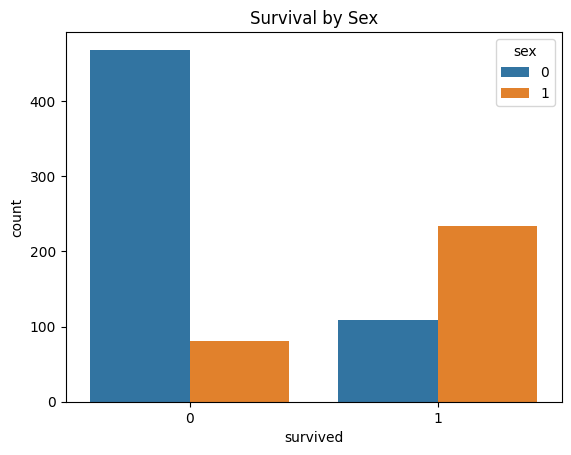

In [11]:
sns.countplot(x='survived', hue='sex', data=df)
plt.title("Survival by Sex")
plt.show()

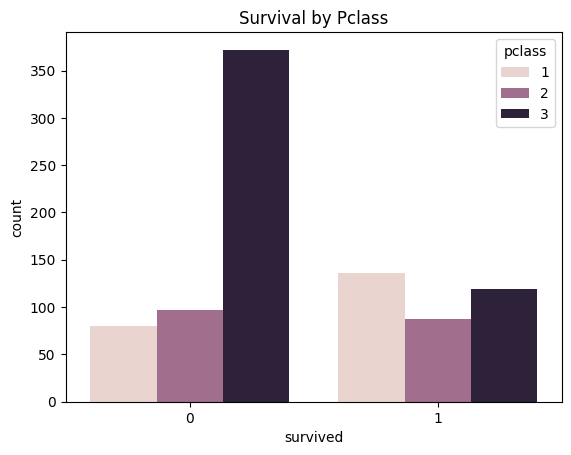

In [12]:
sns.countplot(x='survived', hue='pclass', data=df)
plt.title("Survival by Pclass")
plt.show()

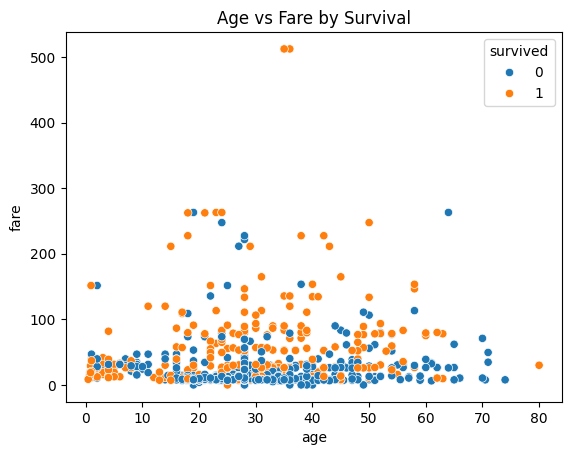

In [13]:
sns.scatterplot(data=df, x='age', y='fare', hue='survived')
plt.title("Age vs Fare by Survival")
plt.show()

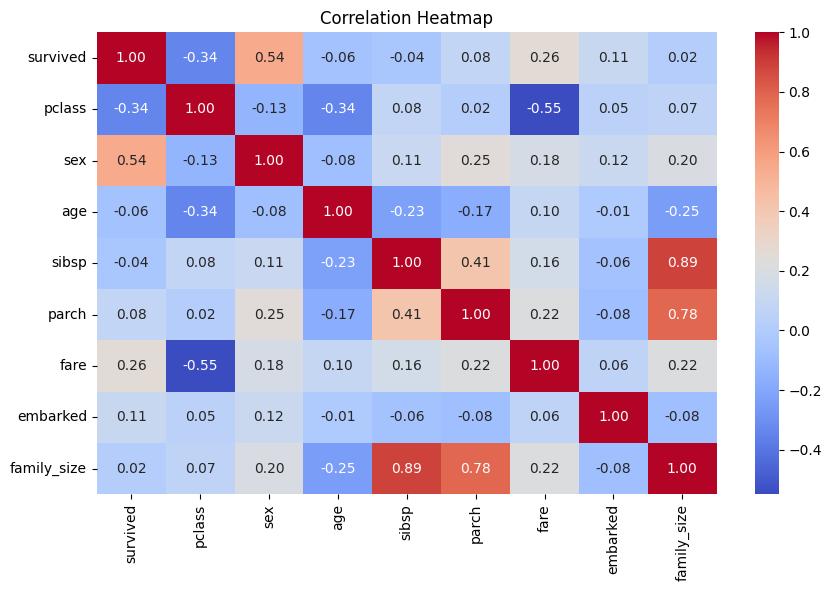

In [15]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
def remove_outliers_iqr(data, cols):
    outlier_indices = []
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower) | (data[col] > upper)].index
        outlier_indices.extend(outliers)
        print(f"{col}: {len(outliers)} outliers detected")
    unique_indices = list(set(outlier_indices))
    print(f"Total outliers removed: {len(unique_indices)}")
    return data.drop(index=unique_indices)

In [17]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col != 'survived']
df_cleaned = remove_outliers_iqr(df, numeric_cols)

pclass: 0 outliers detected
sex: 0 outliers detected
age: 66 outliers detected
sibsp: 46 outliers detected
parch: 213 outliers detected
fare: 116 outliers detected
embarked: 0 outliers detected
family_size: 91 outliers detected
Total outliers removed: 314


In [18]:
print( df_cleaned.shape)

(577, 16)


In [19]:
print(df_cleaned.groupby('sex')['survived'].mean())

sex
0    0.16129
1    0.72028
Name: survived, dtype: float64


In [20]:
print(df_cleaned.groupby('pclass')['survived'].mean())

pclass
1    0.530120
2    0.371901
3    0.225201
Name: survived, dtype: float64


In [21]:
print(df_cleaned.groupby('survived')['fare'].describe())

          count       mean        std  min     25%    50%    75%     max
survived                                                                
0         404.0  12.710073  10.373799  0.0  7.7500   8.05  13.00  61.175
1         173.0  20.101953  15.543035  0.0  7.8958  13.00  26.55  59.400


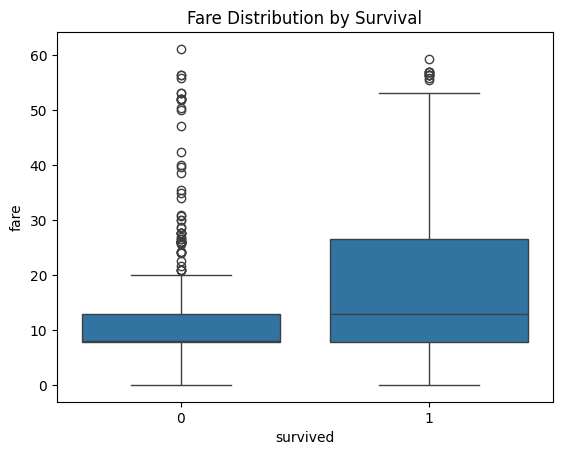

In [22]:
sns.boxplot(x='survived', y='fare', data=df_cleaned)
plt.title("Fare Distribution by Survival")
plt.show()

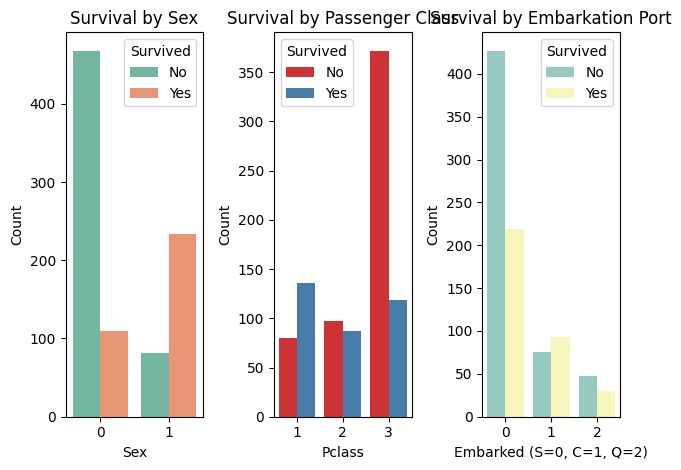

In [23]:
plt.subplot(1, 3, 1)
sns.countplot(x='sex', hue='survived', data=df, palette='Set2')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.subplot(1, 3, 2)
sns.countplot(x='pclass', hue='survived', data=df, palette='Set1')
plt.title('Survival by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.subplot(1, 3, 3)
sns.countplot(x='embarked', hue='survived', data=df, palette='Set3')
plt.title('Survival by Embarkation Port')
plt.xlabel('Embarked (S=0, C=1, Q=2)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()